# Testing View Graph

## Creating View Graph

In [1]:
# Parameters
from Parameters import Parameters

# Utitlies for mathematical calculation, isovist and visualization
from Isovist import Isovist
from Plotter import Plotter
from Utility import Utility

# Container -> Environment -> View Graph
from Container import Container
from Environment import IndoorEnvironment
from ViewGraph import ViewGraph

In [2]:
Parameters.set_env("real")  # this can be set to "basic" environment, "hypo" environment as well
Parameters.print_info()

--------------------------------------
Real-world environment is active

Static Variables: 
	epsilon: 0.01
	precision: 2
	alpha: 40
	fov: 160
	min_area: 1000000
	max_area: 1000000
	door_weight: 50
	turn_weight: 0.05
--------------------------------------


In [3]:
def read_env():
    # Basic environment
    if Parameters.basic:
        address = 'envs/basic/'
        pfiles = ['t_bound.geojson']
        hfiles = [None]
        dfiles = ['t_doors.geojson']
        dpfiles = [None]
        lfiles = ['t_landmarks.geojson']
        # create an indoor environment
        ie = IndoorEnvironment(address, pfiles, hfiles, dfiles, dpfiles, lfiles)

    # Hypo environment
    elif Parameters.hypo:
        address = 'envs/hypo/'
        pfiles = ['hypo_env.geojson']
        hfiles = ['hypo_holes.geojson']
        dfiles = ['hypo_doors.geojson']
        dpfiles = ['hypo_dpoints.geojson']
        lfiles = ['hypo_landmarks.geojson']
        # create an indoor environment
        ie = IndoorEnvironment(address, pfiles, hfiles, dfiles, dpfiles, lfiles)

    # MC5 real world environment
    else:
        address = 'envs/mc-floor-5/'
        pfiles, hfiles, dfiles, dpfiles, lfiles = IndoorEnvironment.reformat(
            address, 'containers.geojson', 'doors.geojson', 'landmarks.geojson')
        # create an indoor environment
        ie = IndoorEnvironment('', pfiles, hfiles, dfiles, dpfiles, lfiles)
    return ie

ie = read_env()

environment files -- count is valid
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)


In [4]:
# create view graph
vgs, isovist_objects = ie.construct_view_graph()


*******************************************
Analyzing: Emergency Stairs
Container environment is valid: True
region initial : 1
regions : 1 -- 1
calculating the visibility signatures...
calculating adjacency matrix for regions
finding regions that contains doors/gateways and decision points
decompose views
len: 12
constructing view graph for regions
calculating all spatial relationships visible in each view
Adding actions to views (nodes)
Adding actions to view relations (edges)

*******************************************
Analyzing: Women Toilet
Container environment is valid: True
region initial : 3
regions : 4 -- 3
calculating the visibility signatures...
calculating adjacency matrix for regions
finding regions that contains doors/gateways and decision points
decompose views
len: 49
constructing view graph for regions
calculating all spatial relationships visible in each view
Adding actions to views (nodes)
Adding actions to view relations (edges)

*********************************

## Testing View Graph 

### Connectivity
Is the resulted view graph connected? If not, what are the components and why there is connectivity issue?

In [5]:
import networkx as nx

for idx, vg in enumerate(vgs):
    print('id: {2} -- {0} is connected? {1}'.format(vg.name, nx.is_strongly_connected(vg.rviewgraph), idx))
    
# all view graphs are connected!

id: 0 -- Emergency Stairs is connected? True
id: 1 -- Women Toilet is connected? True
id: 2 -- Disabled Toilet is connected? True
id: 3 -- Men Toilet is connected? True
id: 4 -- Corridor is connected? True
id: 5 -- Active Hub is connected? True
id: 6 -- Stairs to Lower Floors is connected? True
id: 7 -- Ngi-a Djerring Gat-ith is connected? True
id: 8 -- UX Lab is connected? True


Checking The connection between the view graphs -> into the large graph representation.

enter: Corridor
enter: Active Hub


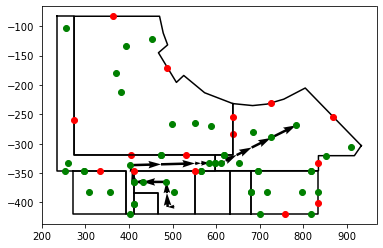

<Figure size 432x288 with 0 Axes>

In [6]:
# todo: set parameters to Parameters class
start_container = 'Women Toilet'
start_region = 3
end_container = 'Active Hub'
end_region = 3
vp, pv = ie.shortest_path(start_container, start_region, end_container, end_region)

# plot shortest path
plotter = Plotter()
for isovist_object in ie.isovist_objects:
    plotter.add_isovist(isovist_object)
plotter.add_views(pv)
plotter.show(False)
plotter.close()

In [7]:
vp

['Women Toilet-V108',
 'Women Toilet-V118',
 'Women Toilet-V119',
 'Women Toilet-V83',
 'Women Toilet-V84',
 'Women Toilet-V85',
 'Corridor-V956',
 'Corridor-V957',
 'Corridor-V958',
 'Corridor-V298',
 'Corridor-V299',
 'Corridor-V300',
 'Corridor-V301',
 'Corridor-V302',
 'Corridor-V303',
 'Corridor-V304',
 'Corridor-V305',
 'Active Hub-V734',
 'Active Hub-V735',
 'Active Hub-V48',
 'Active Hub-V49',
 'Active Hub-V50',
 'Active Hub-V51',
 'Active Hub-V52',
 'Active Hub-V53',
 'Active Hub-V480']

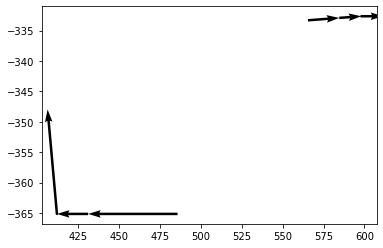

<Figure size 432x288 with 0 Axes>

In [9]:
idxes = [4,5,6,7,15,16,17,18]
plotter = Plotter()

plotter.add_views([p for p in pv if pv.index(p) in idxes])
plotter.show(False)
plotter.close()

In [12]:
ie.graph['Women Toilet-V85']

AtlasView({'Women Toilet-V53': {'weight': 190450.68000000014, 'label': 'move', 'action': 'follow'}, 'Women Toilet-V55': {'weight': 190450.68000000014, 'label': 'move', 'action': 'follow'}, 'Women Toilet-V58': {'weight': 190450.68000000014, 'label': 'move', 'action': 'follow'}, 'Women Toilet-V61': {'weight': 190450.68000000014, 'label': 'move', 'action': 'turn right'}, 'Women Toilet-V65': {'weight': 190450.68000000014, 'label': 'move', 'action': 'turn right'}, 'Corridor-V946': {'weight': 190500.68000000014, 'label': 'Enter the door to corridor', 'action': 'enter'}, 'Corridor-V949': {'weight': 190500.68000000014, 'label': 'Enter the door to corridor', 'action': 'enter'}, 'Corridor-V951': {'weight': 190500.68000000014, 'label': 'Enter the door to corridor', 'action': 'enter'}, 'Corridor-V953': {'weight': 190500.68000000014, 'label': 'Enter the door to corridor', 'action': 'enter'}, 'Corridor-V956': {'weight': 190500.68000000014, 'label': 'Enter the door to corridor', 'action': 'enter'}})

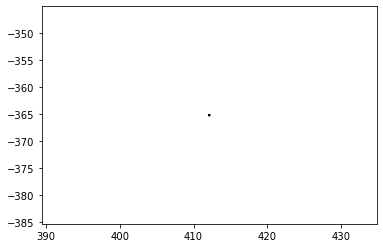

<Figure size 432x288 with 0 Axes>

In [13]:
idxes = [946, 949, 951, 953, 956]
plotter = Plotter()
plotter.add_views([vgs[4].rviews[idx] for idx in idxes])
plotter.show(False)
plotter.close()